# Análise Comparativa de Ferramentas AutoML
## Resultados para SBSeg 2024 e JBCS 2024


## Métricas Utilizadas na Análise

Nesta análise, avaliamos o desempenho das ferramentas AutoML utilizando as seguintes métricas:
 
 - **Acurácia**: Porcentagem de previsões corretas em relação ao total
 - **Precisão**: Proporção de verdadeiros positivos entre todas as previsões positivas
 - **Recall (Revocação)**: Proporção de verdadeiros positivos identificados corretamente
 - **F1-Score**: Média harmônica entre precisão e recall
 - **MCC (Matthews Correlation Coefficient)**: Medida de qualidade de classificação binária que considera todos os valores da matriz de confusão
 - **Tempo de Execução**: Tempo necessário para treinamento e validação (em segundos)
 
Estas métricas fornecem uma visão abrangente do desempenho dos modelos sob diferentes perspectivas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configurações gerais de estilo
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\joner\AppData\Local\Temp\ipykernel_9076\3442064236.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Parte 1: Resultados SBSeg 2024
### Métricas de Desempenho

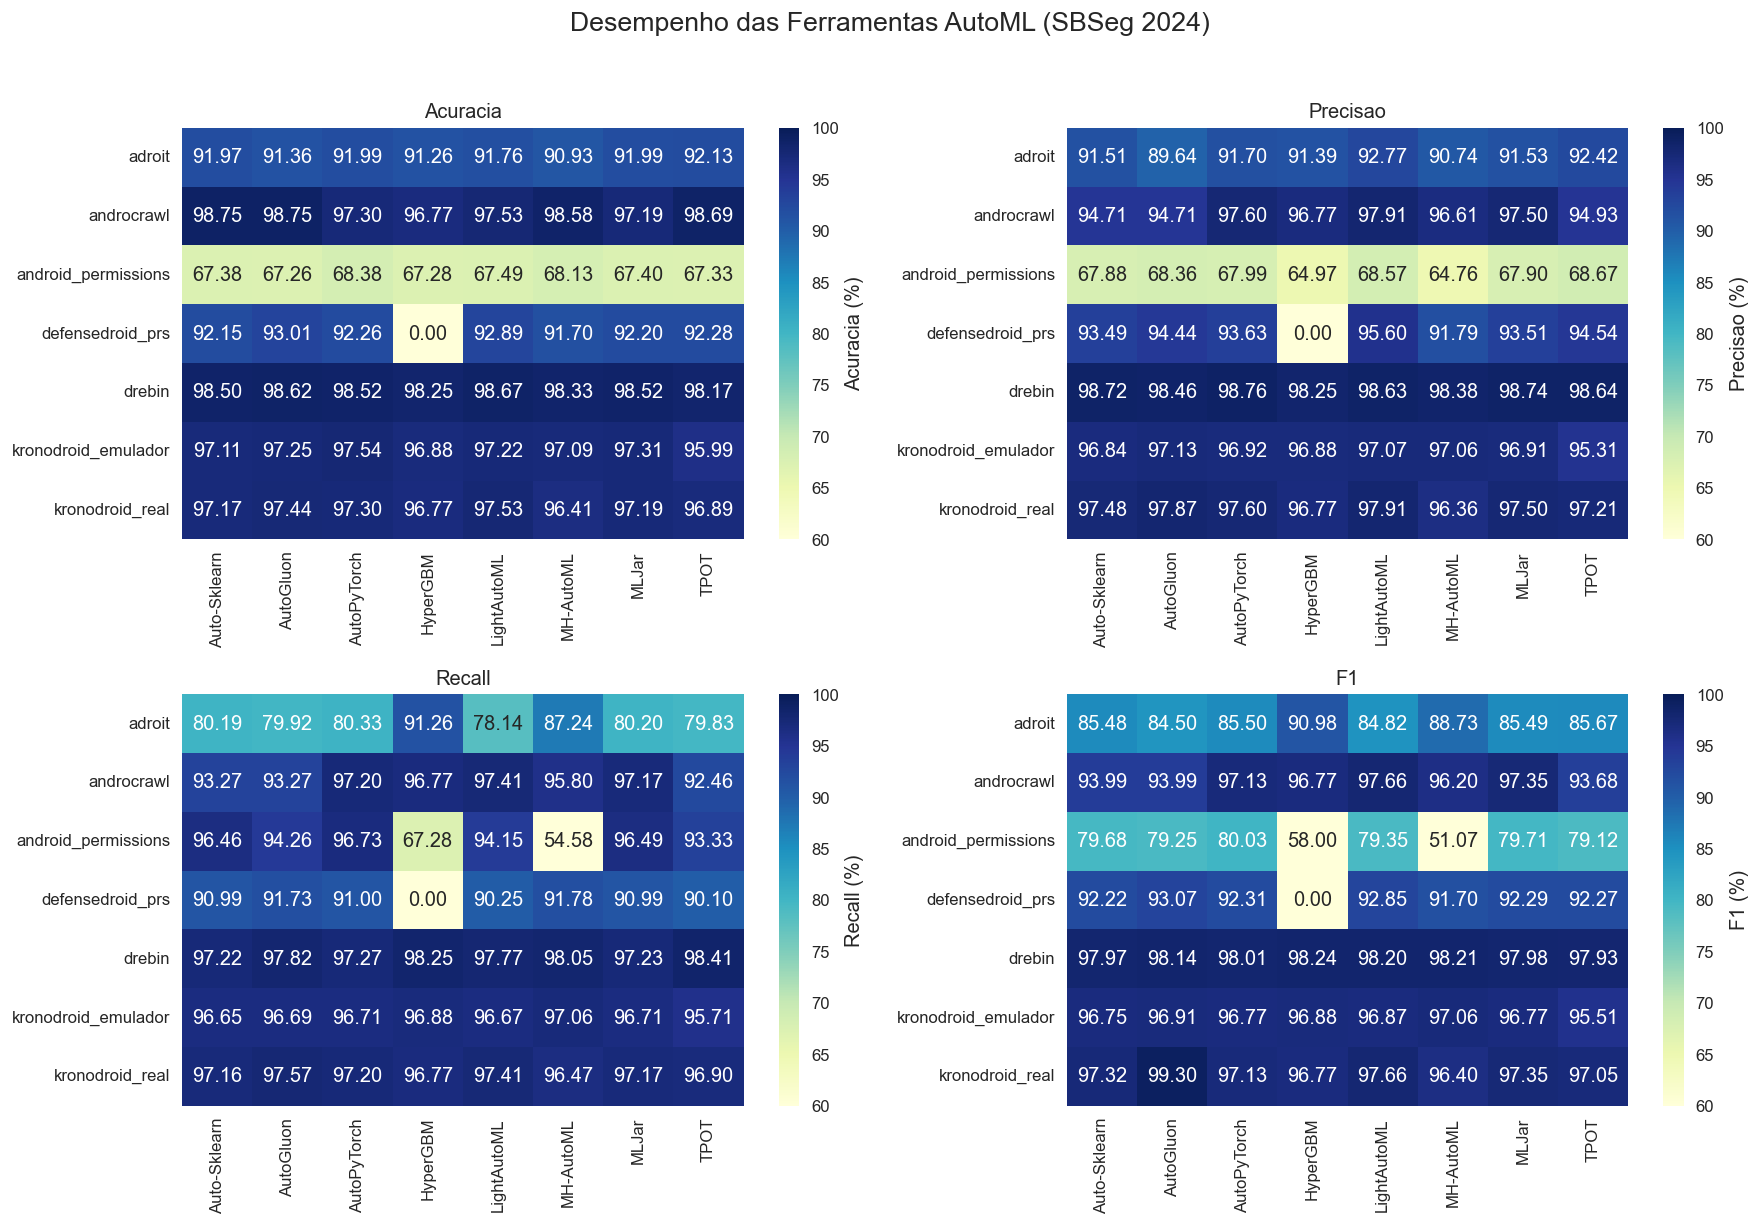

In [2]:
# Função para plotar heatmaps de métricas
def plot_metrics_heatmap(df, metrics, filename, title="", figsize=(15, 10)):
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(title, y=1.02, fontsize=16)
    
    for i, metric in enumerate(metrics):
        row, col = i // 2, i % 2
        pivot_df = df.pivot(index='dataset', columns='ferramenta', values=metric)
        
        sns.heatmap(pivot_df, ax=axs[row, col], annot=True, cmap='YlGnBu', 
                   fmt='.2f', cbar_kws={'label': f'{metric.capitalize()} (%)'},
                   vmin=60, vmax=100, annot_kws={"size": 12})
        
        axs[row, col].set_title(f'{metric.capitalize()}')
        axs[row, col].set_xlabel('')
        axs[row, col].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Carregar dados SBSeg
df_sbseg = pd.read_csv('dados_desempenho_automl_old.csv')
metrics = ['acuracia', 'precisao', 'recall', 'f1']

plot_metrics_heatmap(df_sbseg, metrics, 'heatmap_desempenho_automl_sbseg24.png',
                    "Desempenho das Ferramentas AutoML (SBSeg 2024)")


 ### Análise de Tempo de Execução

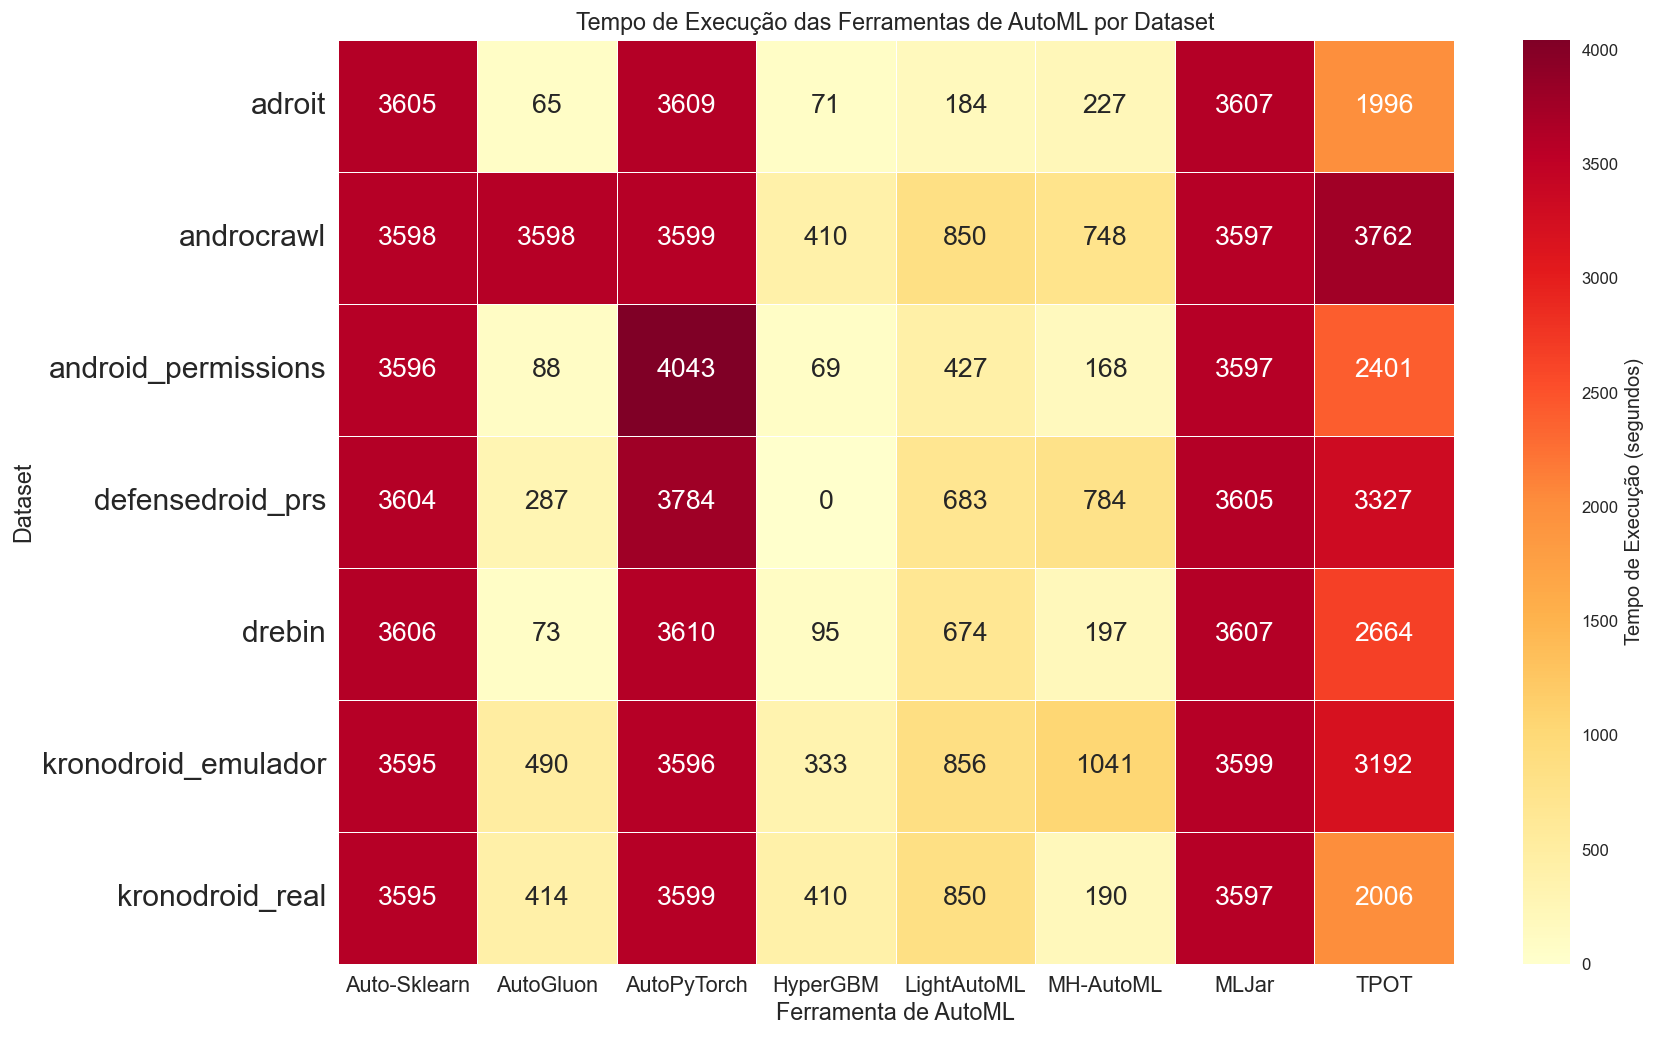

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV (substitua 'dados_desempenho_automl.csv' pelo caminho correto do seu arquivo CSV)
df = pd.read_csv('dados_desempenho_automl_old.csv')

# Converter a coluna de tempo para um formato numérico (segundos)
df['tempo'] = pd.to_timedelta(df['tempo']).dt.total_seconds()

# Criar um pivot table para preparar os dados para o mapa de calor
pivot_df = df.pivot(index='dataset', columns='ferramenta', values='tempo')

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar o mapa de calor usando Seaborn
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Tempo de Execução (segundos)'}, annot_kws={"size": 16}, linewidths=.3)
# Ajustando o tamanho da fonte dos eixos x e y
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)
# Adicionar título e labels dos eixos
plt.title('Tempo de Execução das Ferramentas de AutoML por Dataset',fontsize=14)
plt.xlabel('Ferramenta de AutoML',fontsize=14)
plt.ylabel('Dataset',fontsize=14)

# Salvar o gráfico como PNG
plt.savefig('heatmap_tempo_execucao_automl_sbseg24.png')

# Mostrar o mapa de calor
plt.show()


## Frameworks destaques

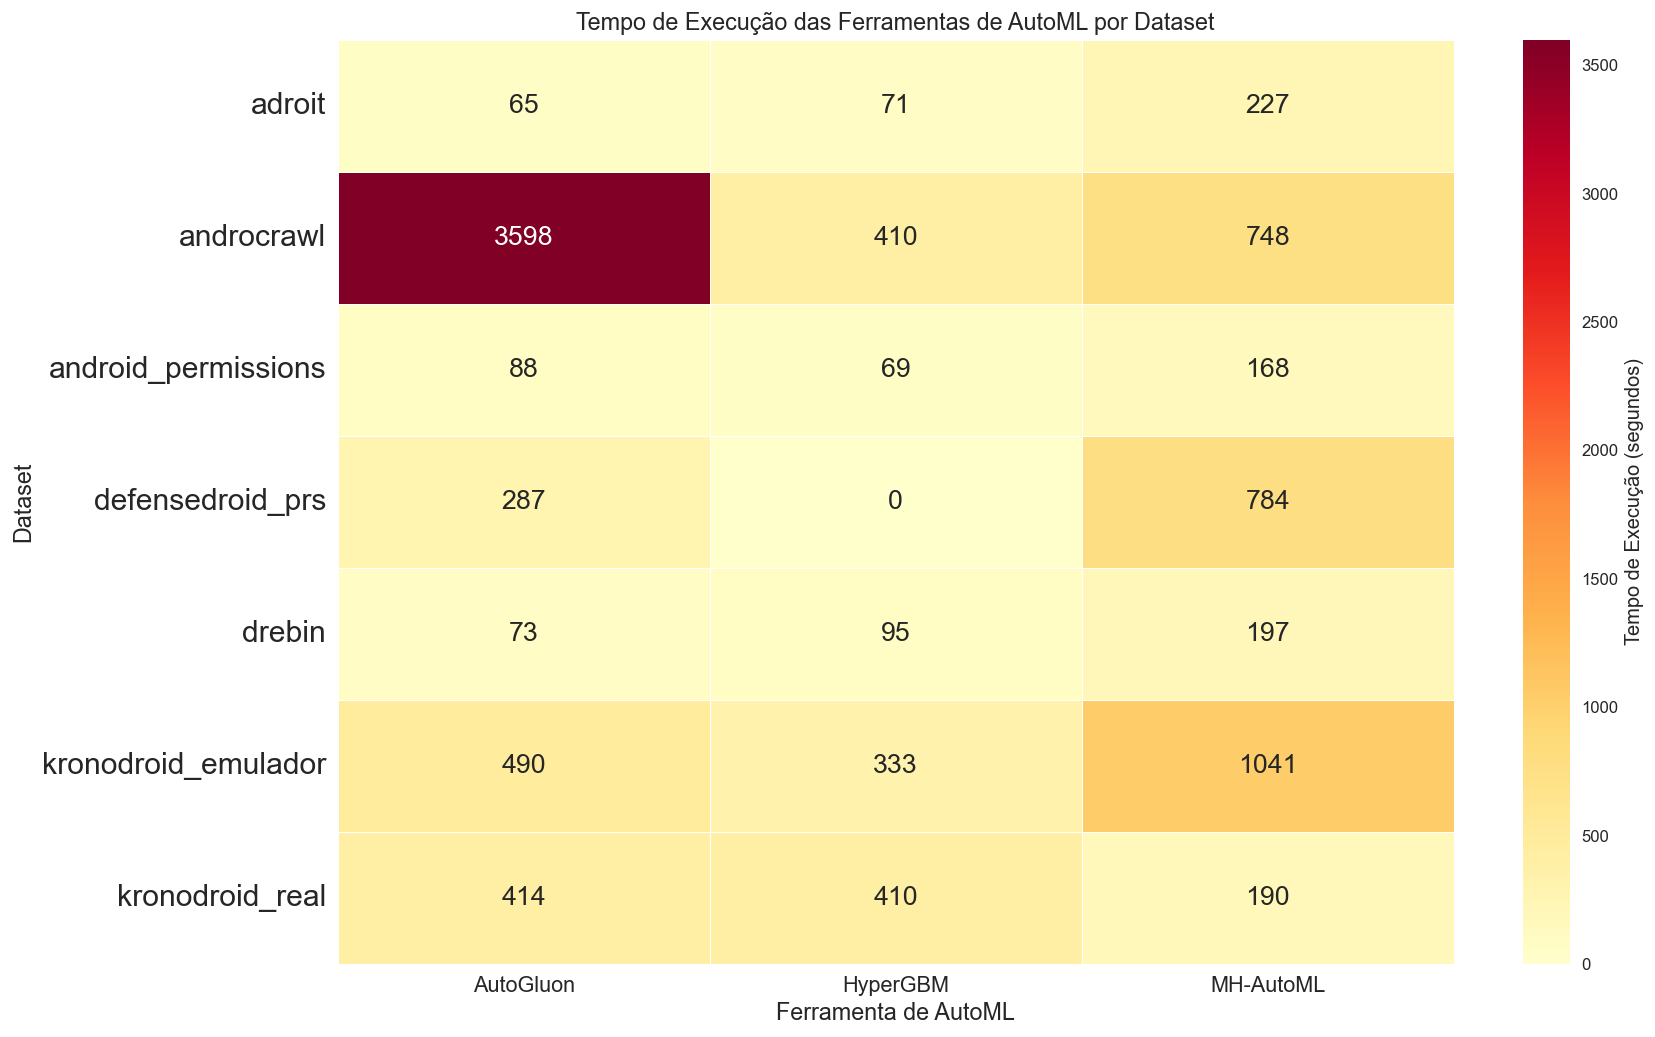

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV (substitua 'dados_desempenho_automl.csv' pelo caminho correto do seu arquivo CSV)
df = pd.read_csv('dados_desempenho_automl_old.csv')

# Converter a coluna de tempo para um formato numérico (segundos)
df['tempo'] = pd.to_timedelta(df['tempo']).dt.total_seconds()

# Filtrar o DataFrame apenas para as ferramentas 'MH-AutoML', 'AutoGluon' e 'HyperGBM'
ferramentas_selecionadas = ['MH-AutoML', 'AutoGluon', 'HyperGBM']
df_filtrado = df[df['ferramenta'].isin(ferramentas_selecionadas)]

# Criar um pivot table para preparar os dados para o mapa de calor
pivot_df = df_filtrado.pivot(index='dataset', columns='ferramenta', values='tempo')

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar o mapa de calor usando Seaborn
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Tempo de Execução (segundos)'}, annot_kws={"size": 16}, linewidths=.3)

# Ajustando o tamanho da fonte dos eixos x e y
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)

# Adicionar título e labels dos eixos
plt.title('Tempo de Execução das Ferramentas de AutoML por Dataset', fontsize=14)
plt.xlabel('Ferramenta de AutoML', fontsize=14)
plt.ylabel('Dataset', fontsize=14)

# Salvar o gráfico como PNG
plt.savefig('heatmap_tempo_execucao_automl_filtrado_sbseg24.png')

# Mostrar o mapa de calor
plt.show()


## Parte 2: Resultados JBCS 2024
### Métricas de Desempenho em Datasets Originais

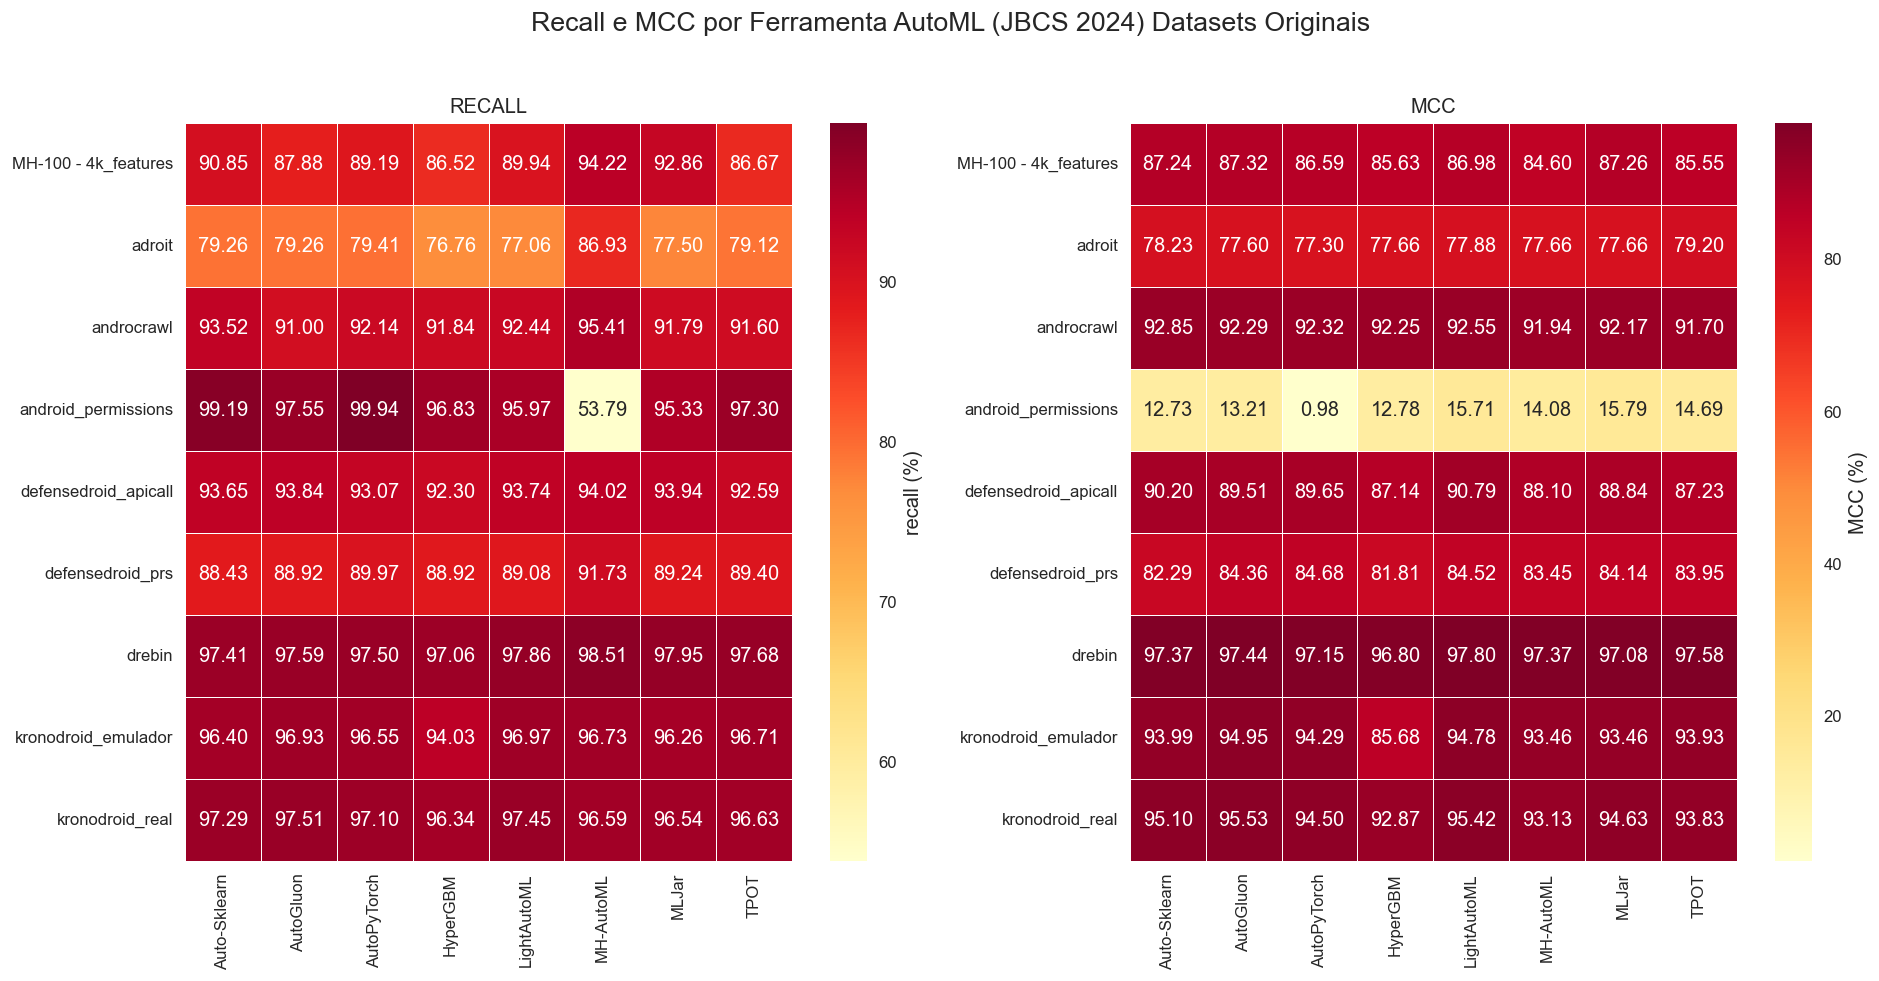

In [5]:
# Carregar dados JBCS
df_jbcs = pd.read_csv('dados_desempenho_automl_datasets_originais_SBCS24.csv')

def plot_jbcs_metrics(df, metrics, filename, title=""):
    fig, axs = plt.subplots(1, len(metrics), figsize=(8*len(metrics), 8))
    fig.suptitle(title, y=1.02, fontsize=16)
    
    for i, metric in enumerate(metrics):
        pivot_df = df.pivot(index='dataset', columns='ferramenta', values=metric).fillna(0)
        
        sns.heatmap(pivot_df, ax=axs[i], annot=True, cmap='YlOrRd', 
                   fmt='.2f', cbar_kws={'label': f'{metric} (%)'},
                   annot_kws={"size": 12}, linewidths=.5)
        
        axs[i].set_title(metric.upper())
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

plot_jbcs_metrics(df_jbcs, ['recall', 'MCC'], 
                 'heatmap_desempenho_automl_mcc_recall_SBCS24.png',
                 "Recall e MCC por Ferramenta AutoML (JBCS 2024) Datasets Originais")

### Tempo de Execução em Datasets Originais


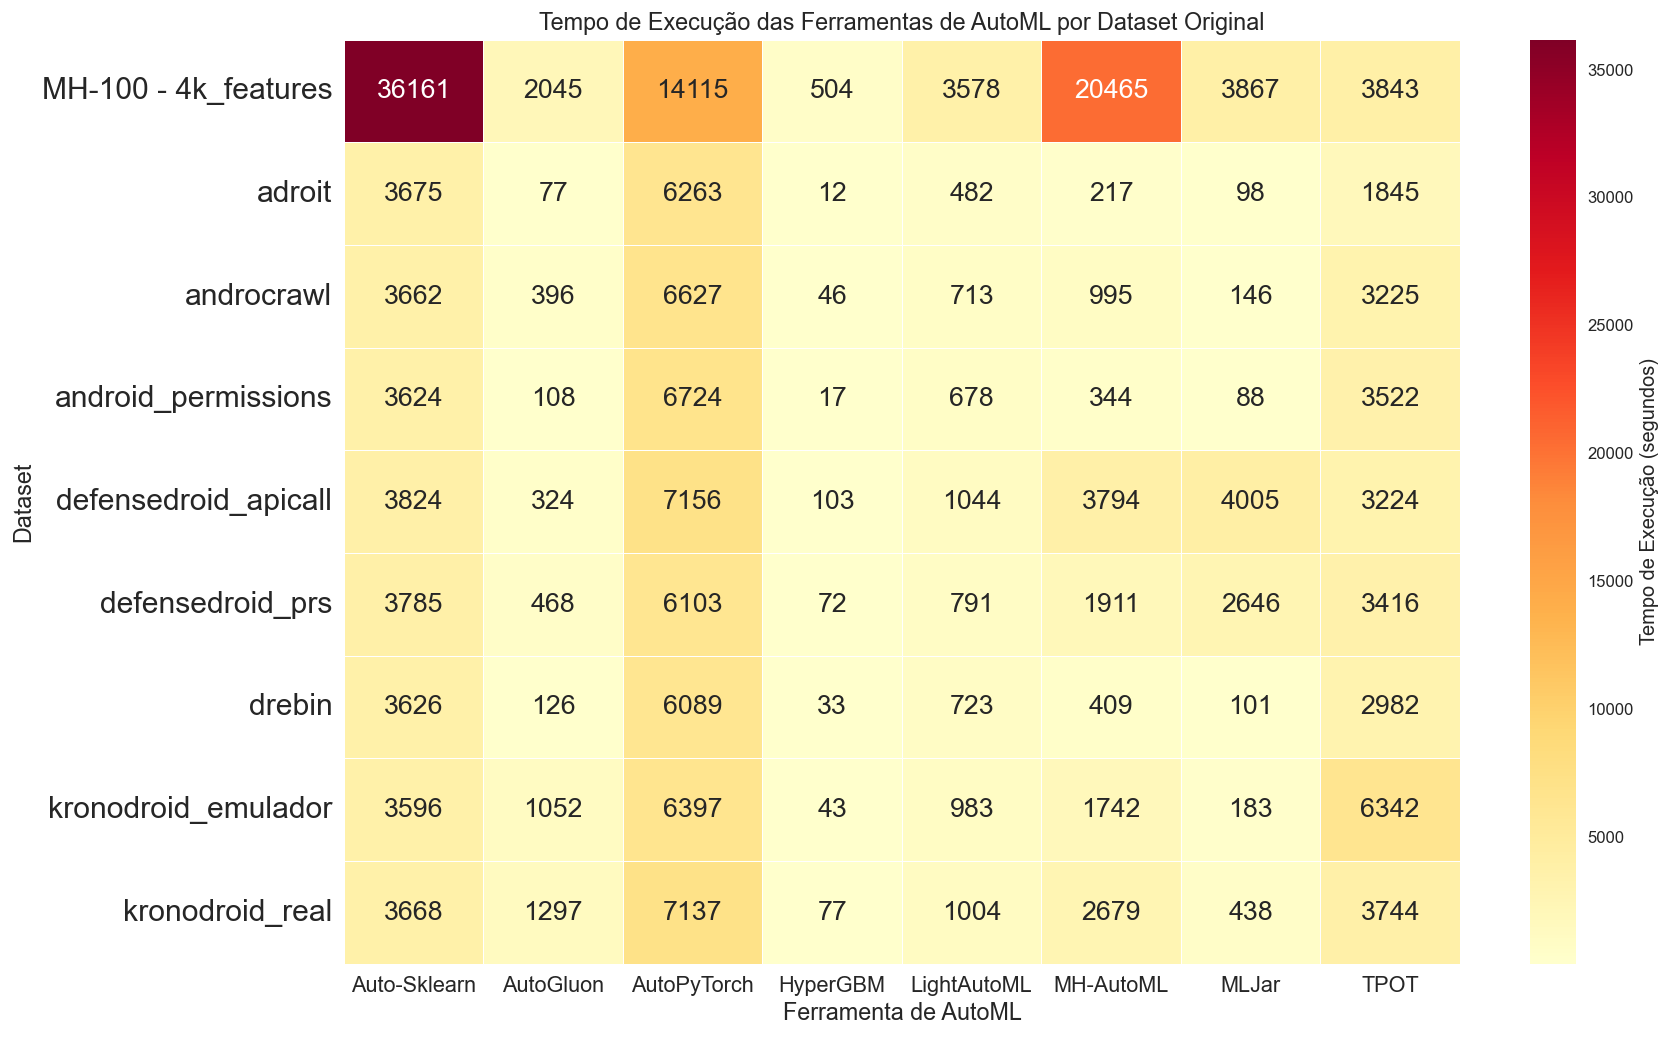

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV (substitua 'dados_desempenho_automl.csv' pelo caminho correto do seu arquivo CSV)
df = pd.read_csv('dados_desempenho_automl_datasets_originais_SBCS24.csv')

# Converter a coluna de tempo para um formato numérico (segundos)
df['tempo'] = pd.to_timedelta(df['tempo']).dt.total_seconds()

# Criar um pivot table para preparar os dados para o mapa de calor
pivot_df = df.pivot(index='dataset', columns='ferramenta', values='tempo')

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar o mapa de calor usando Seaborn
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Tempo de Execução (segundos)'}, annot_kws={"size": 16}, linewidths=.3)
# Ajustando o tamanho da fonte dos eixos x e y
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)
# Adicionar título e labels dos eixos
plt.title('Tempo de Execução das Ferramentas de AutoML por Dataset Original',fontsize=14)
plt.xlabel('Ferramenta de AutoML',fontsize=14)
plt.ylabel('Dataset',fontsize=14)

# Salvar o gráfico como PNG
plt.savefig('heatmap_tempo_execucao_automl_sbcs_original_dataset.png')

# Mostrar o mapa de calor
plt.show()


### Métricas de Desempenho em Datasets Balanceados de amostras unicas

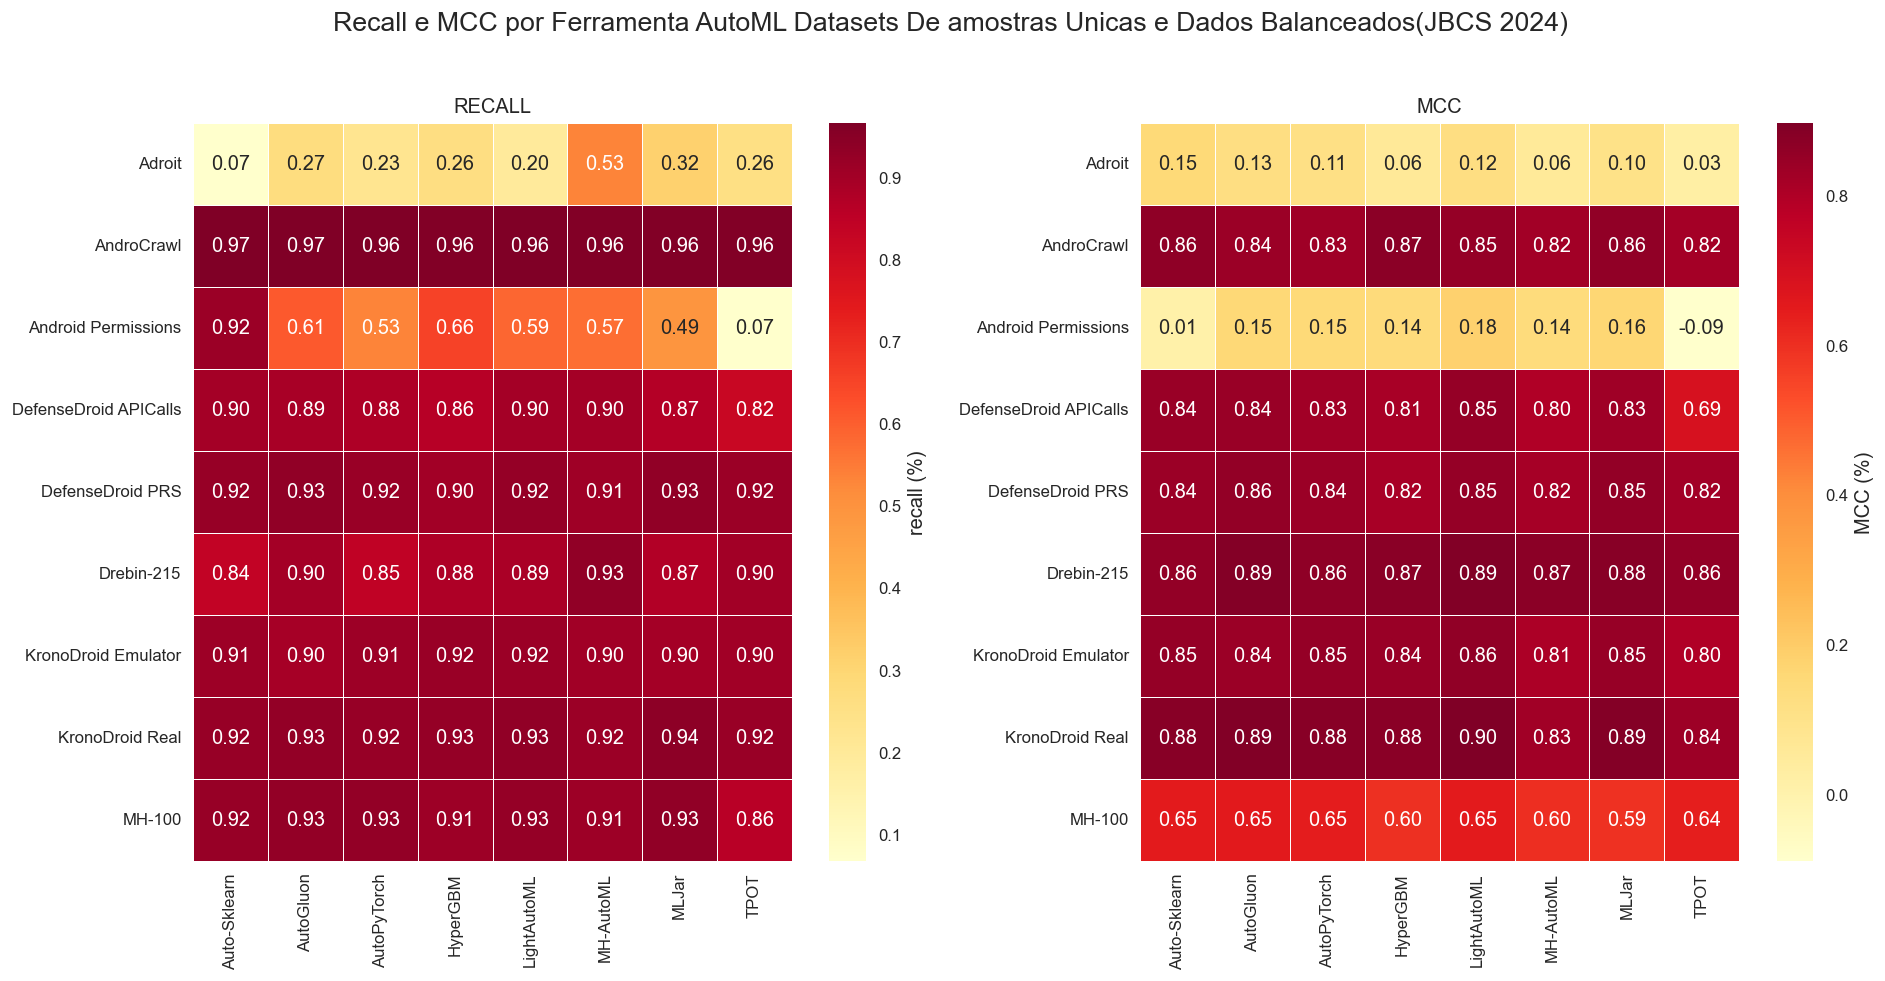

In [7]:
# Carregar dados JBCS
df_jbcs_unic = pd.read_csv('dados_desempenho_automl_datasets_balanceados_SBCS24.csv')

def plot_jbcs_metrics(df, metrics, filename, title=""):
    fig, axs = plt.subplots(1, len(metrics), figsize=(8*len(metrics), 8))
    fig.suptitle(title, y=1.02, fontsize=16)
    
    for i, metric in enumerate(metrics):
        pivot_df = df.pivot(index='dataset', columns='ferramenta', values=metric).fillna(0)
        
        sns.heatmap(pivot_df, ax=axs[i], annot=True, cmap='YlOrRd', 
                   fmt='.2f', cbar_kws={'label': f'{metric} (%)'},
                   annot_kws={"size": 12}, linewidths=.5)
        
        axs[i].set_title(metric.upper())
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

plot_jbcs_metrics(df_jbcs_unic, ['recall', 'MCC'], 
                 'heatmap_desempenho_automl_mcc_recall_unic_SBCS24.png',
                 "Recall e MCC por Ferramenta AutoML Datasets De amostras Unicas e Dados Balanceados(JBCS 2024)")

### Tempo de Execução em Datasets Balanceados de Amostras unicas


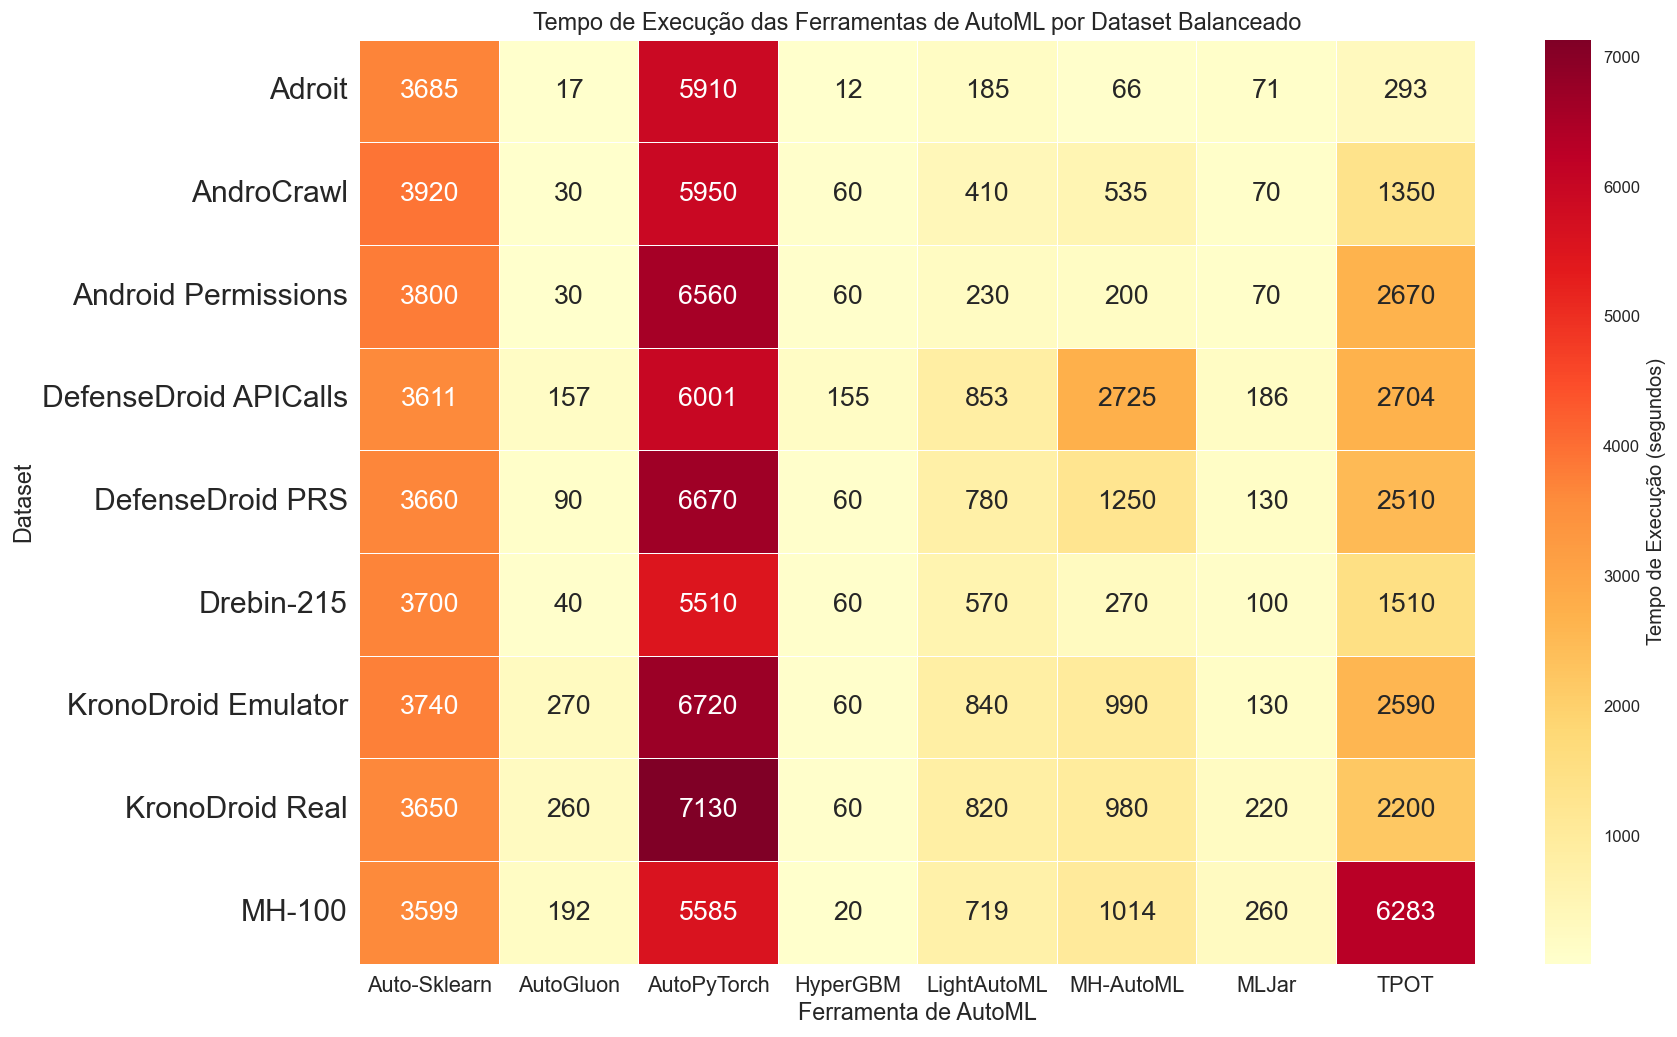

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV (substitua 'dados_desempenho_automl.csv' pelo caminho correto do seu arquivo CSV)
df = pd.read_csv('dados_desempenho_automl_datasets_balanceados_SBCS24.csv')

# Converter a coluna de tempo para um formato numérico (segundos)
df['tempo'] = pd.to_timedelta(df['tempo']).dt.total_seconds()

# Criar um pivot table para preparar os dados para o mapa de calor
pivot_df = df.pivot(index='dataset', columns='ferramenta', values='tempo')

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar o mapa de calor usando Seaborn
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'Tempo de Execução (segundos)'}, annot_kws={"size": 16}, linewidths=.3)
# Ajustando o tamanho da fonte dos eixos x e y
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)
# Adicionar título e labels dos eixos
plt.title('Tempo de Execução das Ferramentas de AutoML por Dataset Balanceado',fontsize=14)
plt.xlabel('Ferramenta de AutoML',fontsize=14)
plt.ylabel('Dataset',fontsize=14)

# Salvar o gráfico como PNG
plt.savefig('heatmap_tempo_execucao_automl_sbcs_balanceado_dataset.png')

# Mostrar o mapa de calor
plt.show()
